# Solutions 06

**Due:** 2020-03-24, 11:59 PM, as an IPython notebook (with related files) submitted via your repo in the course GitHub organization.  Use the solutions template notebook, and **be sure not to modify the subproblem cells** in your solution file (put your work in *new* cells).

### Problem 1.1 (2 points):

Consider a two-state homogeneous Markov chain; let's label the states with the integers 0 and 1.  Suppose the probability for a transition from state 0 to state 1 is $\alpha$, and that for a transition from state 1 to state 0 is $\beta$ (note that these definitions differ from those used in Lec13).

> * Write down the transition matrix defining this Markov chain (using MathJax matrix notation).
> * Derive the equillibrium distribution PMF from the transition matrix. You should find that it has the following probabilities for states 0 and 1, respectively:
\begin{align}
p_0 &= \frac{\beta}{\alpha + \beta},\\
p_1 &= \frac{\alpha}{\alpha + \beta}.\\
\end{align}

> The transition matrix:
$$
\mathbf{T} = 
\begin{bmatrix}
  1 - \alpha & \beta \\
  \alpha & 1-\beta
\end{bmatrix}
$$

> The equillibrium distribution PMF:

Compute the eigenvalues and corresponding eigenvectors of T:
$$\lambda_1=1 \quad e_1=
\begin{bmatrix}
  \frac{\beta}{\sqrt{\alpha^2+\beta^2}} \\
  \frac{\alpha}{\sqrt{\alpha^2+\beta^2}} 
\end{bmatrix},
\quad \lambda_2=1-\alpha-\beta < 1 \quad e_2=
\begin{bmatrix}
  \frac{1}{\sqrt{2}} \\
  \frac{-1}{\sqrt{2}}
\end{bmatrix}$$

Conduct Spectral decomposition on the transition matrix,then we have:
$$ \mathbf{T}^n = \lambda_1^n e_1 +\lambda_2^n e_2 $$
As n grows, all the eigenvectors damp away except for the one with the biggest eigenvalue, that is $e_1$ in this setting. Therefore, the equillibrium distribution $[p_0,p_1]^T$ satisfies:
$$\frac{p_0}{p_1}=\frac{e_{1,1}}{e_{1,2}}=\frac{\frac{\beta}{\sqrt{\alpha^2+\beta^2}}}{\frac{\alpha}{\sqrt{\alpha^2+\beta^2}}}=\frac{\beta}{\alpha}$$
$$p_0+p_1=1$$
It turns out:
\begin{align}
p_0 &= \frac{\beta}{\alpha + \beta},\\
p_1 &= \frac{\alpha}{\alpha + \beta}.\\
\end{align}

### Problem 1.2 (3 points):

A `TwoStateMarkovChain` class is provided for you in the `two_state_markov.py` Python module. Use `TwoStateMarkovChain` in your solution notebook to explore the behavior of two-state chains, creating instances for chains and plotting the behavior of multiple sample paths using the `plot_evol()` method.

> * Create a chain with $(\alpha,\beta) = (0.07,0.03)$, and an initializer that starts **out of equillibrium**.  Simulate sample paths that illustrate convergence of the chain to equillibrium, i.e., with the evolution plot clearly showing out-of-equillibrium behavior at early times.
> * Using the same $(\alpha,\beta)$, show that the equillibrium distribution really is an equillibrium distribution by simulating paths **initialized from the equillibrium distribution**, and showing that the distribution is maintained.
> * Using paths of the same length that you used above, create **two** new chains, with the same equillibrium distribution, one of which converges so slowly that equillibrium is not reached, and one that converges more quickly than the $(0.07,0.03)$ chain.

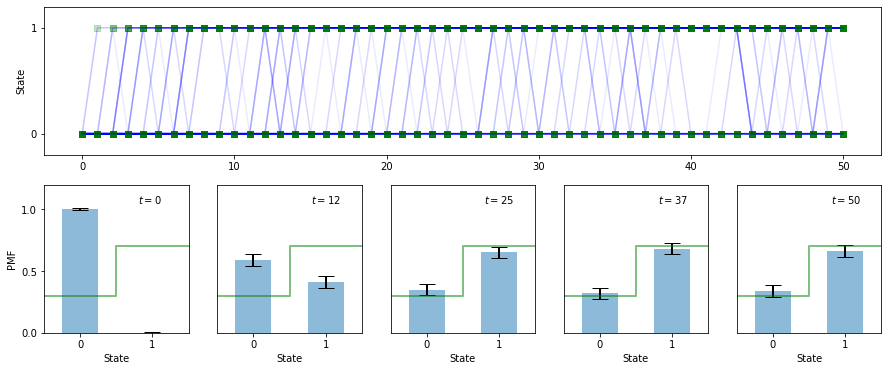

In [3]:
##illustrate convergence of the chain to equillibrium

from matplotlib.pyplot import *
from numpy import *
from scipy import stats
from two_state_markov import TwoStateMarkovChain

alpha, beta = .07, .03
tsmc = TwoStateMarkovChain(alpha, beta)

def init_at_0():
    """
    Initial state sampler returning state 0.
    """
    return 0

n_paths = 100
tsmc.sim_paths(n_paths, init_at_0, 50)
fig = tsmc.plot_evol(alpha_trace=.08, dither=0.)

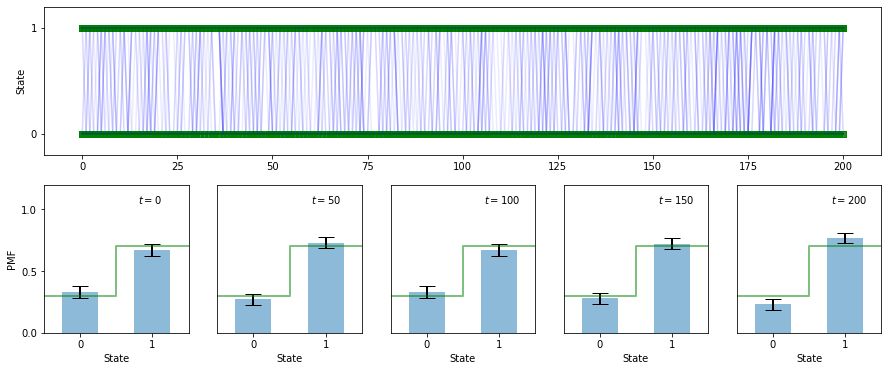

In [30]:
##simulating paths initialized from the equillibrium distribution
alpha, beta = .07, .03
tsmc = TwoStateMarkovChain(alpha, beta)
n_paths = 100
p0=beta/(alpha+beta)
p1=alpha/(alpha+beta)
init_eq = stats.binom(1,p1).rvs
tsmc.sim_paths(n_paths, init_eq, 200)
fig = tsmc.plot_evol(alpha_trace=.08, dither=0.)

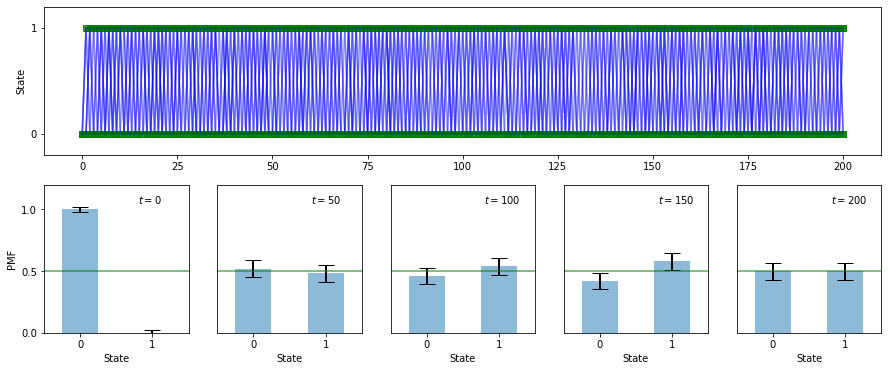

In [97]:
## The converging speed is related to the damping down of other eigenvectors 
## except for the one with the biggest eigenvalues.
## The biggest eigenvalue is 1 and the other is 1-alpha-beta in two-state Markov chain.

alpha1, beta1 = .48, .48
n_paths = 50
tsmc1 = TwoStateMarkovChain(alpha1, beta1)
tsmc1.sim_paths(n_paths, init_at_0, 200)
fig = tsmc1.plot_evol(alpha_trace=.08, dither=0.)

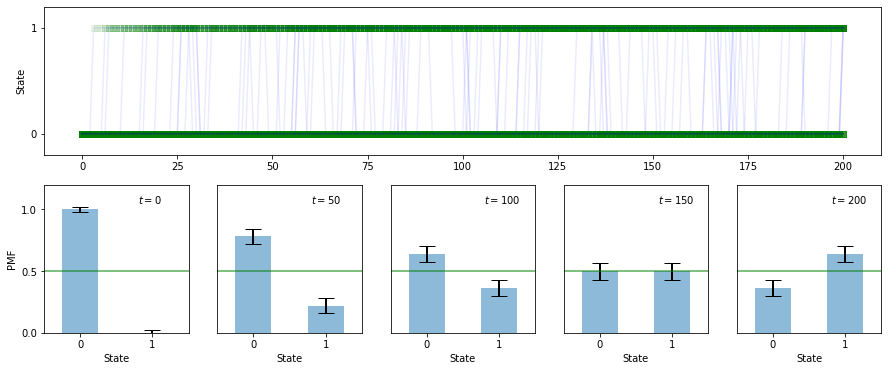

In [99]:
alpha2, beta2 = .01, .01
n_paths = 50
tsmc2 = TwoStateMarkovChain(alpha2, beta2)
tsmc2.sim_paths(n_paths, init_at_0, 200)
fig = tsmc2.plot_evol(alpha_trace=.08, dither=0.)

### Problem 2.1 (3 points):

> Add a new method, with signature `sample_rwm(self, n, w, param0)`, that implements the RWM algorithm for sampling from the posterior distribution, using a uniform proposal distribution of width `w` centered at the current sample.  Calling `sample_rwm` should start a Markov chain with the parameter value `param0`, and return three objects:
> * an array of `n` samples that are approximate draws from the posterior distribution,
> * an accompanying array of `n` values of  $\log(\text{prior}\times\text{likelihood})$ for those samples, 
> * an estimate of the acceptance rate of the chain (the fraction of proposals that are accepted).

> (Don't worry about initialization bias/burn-in for this problem.)

### Problem 2.2 (3 points):

Explore the behavior of the RWM algorithm in the notebook by doing the following for a Cauchy inference instance; use the `CauchyLocationInference` class in the included `poisson_binomial_cauchy` module.  Use the same simulated dataset for each case.

> * Plot a trace plot for the `x0` parameter showing 3 sample paths (on the same set of axes) for a choice of `w` for which the Markov chain has too small of an acceptance rate, so that it stays "stuck" for a long time (10s or 100s of time steps). Additionally, produce a separate trace plot showing the run of $\log(\text{prior}\times\text{likelihood})$ for those sample paths. (There are various ways you could make the two plots; a convenient way to do them in one cell is to use the `subplot` function in `matplotlib.pyplot`.)
> * Plot a trace plot showing 3 sample paths for a choice of `w` for which the Markov chain has too large of an acceptance rate, so that it wanders slowly, not sufficiently exploring the posterior distribution. Again, produce a separate trace plot of the $\log(\text{prior}\times\text{likelihood})$ values.
> * Finally, experiment to find a choice of `w` that gives an acceptance rate somewhere between 20% to 50%.  Using that value, make three plots: (1) A trace plot showing 1 sample path. (2)  A trace plot of $\log(\text{prior}\times\text{likelihood})$. (3) A plot showing the true posterior PDF as a solid curve, and a histogram of the MCMC `x0` samples.

0.06 0.04 0.14


Text(0.5, 1.0, 'Log(pi*l)')

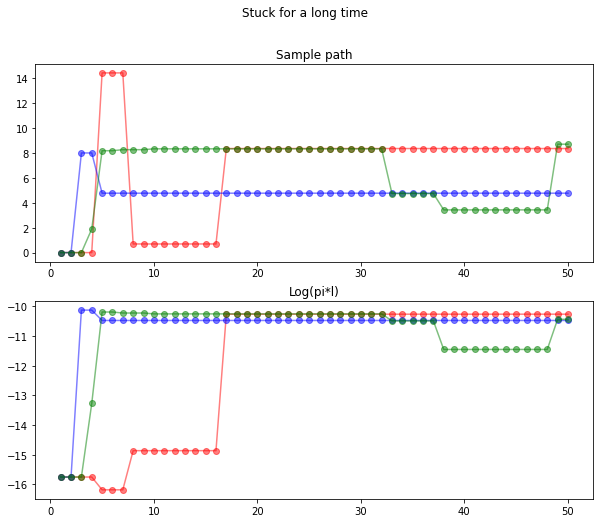

In [100]:
from poisson_binomial_cauchy import CauchyLocationInference

x0, d = 5., 3.
data = stats.cauchy(x0, d).rvs(5)
flat_pdf = .001  # e.g., for prior range 1e3

cli = CauchyLocationInference(d, data, flat_pdf, (-15., 25.))

p1,q1,ac1=cli.sample_rwm(50,100,0)
p2,q2,ac2=cli.sample_rwm(50,100,0)
p3,q3,ac3=cli.sample_rwm(50,100,0)
print(ac1,ac2,ac3)
lst = list(range(1,50+1))

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Stuck for a long time')
ax1.plot(lst,p1, '-o',alpha=.5,color='r',label='w=1')
ax1.plot(lst,p2, '-o',alpha=.5,color='b',label='w=10')
ax1.plot(lst,p3, '-o',alpha=.5,color='g',label='w=50')
ax2.plot(lst,np.log(q1), '-o',alpha=.5,color='r',label='w=1')
ax2.plot(lst,np.log(q2), '-o',alpha=.5,color='b',label='w=10')
ax2.plot(lst,np.log(q3), '-o',alpha=.5,color='g',label='w=50')
ax1.set_title('Sample path')
ax2.set_title('Log(pi*l)')

0.8 0.84 0.84


Text(0.5, 1.0, 'Log(pi*l)')

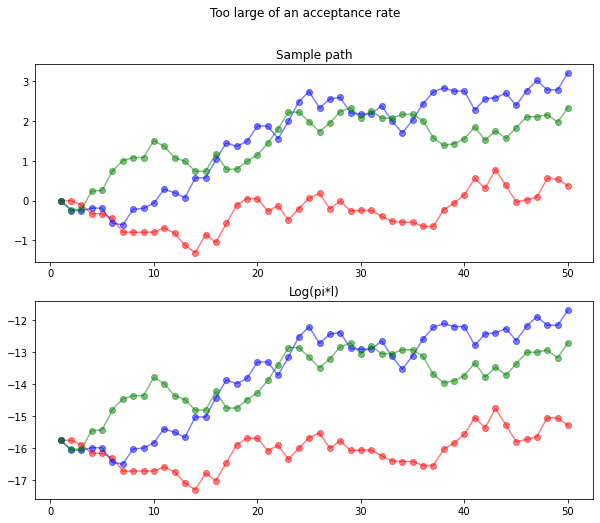

In [101]:
p1,q1,ac1=cli.sample_rwm(50,1,0)
p2,q2,ac2=cli.sample_rwm(50,1,0)
p3,q3,ac3=cli.sample_rwm(50,1,0)
print(ac1,ac2,ac3)
lst = list(range(1,50+1))

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Too large of an acceptance rate')
ax1.plot(lst,p1, '-o',alpha=.5,color='r',label='w=1')
ax1.plot(lst,p2, '-o',alpha=.5,color='b',label='w=1')
ax1.plot(lst,p3, '-o',alpha=.5,color='g',label='w=1')
ax2.plot(lst,np.log(q1), '-o',alpha=.5,color='r',label='w=1')
ax2.plot(lst,np.log(q2), '-o',alpha=.5,color='b',label='w=1')
ax2.plot(lst,np.log(q3), '-o',alpha=.5,color='g',label='w=1')
ax1.set_title('Sample path')
ax2.set_title('Log(pi*l)')



0.516


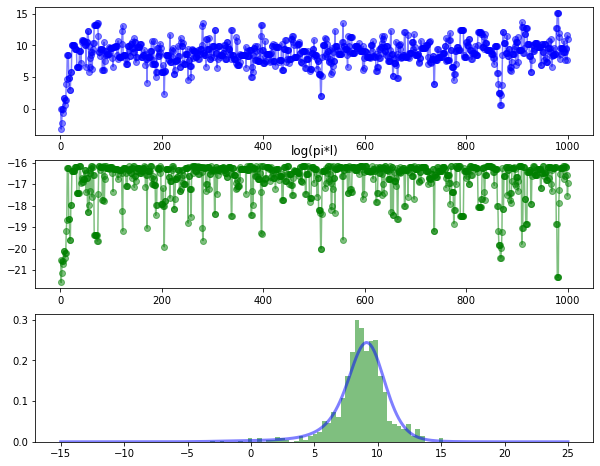

In [96]:
p0,q0,ac0=cli.sample_rwm(1000,10,0)

print(ac0)
lst = list(range(1,1000+1))
plt.rcParams["figure.figsize"] = (10,8)
fig, (ax1, ax2,ax3) = plt.subplots(3)
#fig.suptitle('Too large of an acceptance rate')
ax1.plot(lst,p0, '-o',alpha=.5,color='b')
ax1.set_title('Sample path')
ax2.plot(lst,np.log(q0), '-o',alpha=.5,color='g')
ax2.set_title('Log(pi*l)')
ax3.hist(p0, 50, density=True, color='g', alpha=.5)
cli.plot(alpha=.5)
plt.show()